# 🔹 Step 0: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Show all columns in output

In [2]:
pd.set_option('display.max_columns', None)

# 🔹 Step 1: Load the Cleaned Dataset


In [12]:
df = pd.read_csv("C:\\Users\\Home\\Documents\\data science\\week8\\data\\cleaned_ecommerce_data.csv",encoding='ISO-8859-1')

# 🔹 Step 2: Quick Overview

In [30]:
print("📊 Dataset Shape:", df.shape)
print("\n🧾 Columns:", df.columns.tolist())
print("\n🔍 Missing Values:\n", df.isnull().sum())
print("\n📈 Summary Stats:\n", df.describe())
print("\n📈 Column list:\n" ,df.columns.tolist())

📊 Dataset Shape: (401604, 16)

🧾 Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'total_amount', 'invoice_type', 'hour', 'date', 'day', 'year', 'month', 'country_group']

🔍 Missing Values:
 InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
total_amount     0
invoice_type     0
hour             0
date             0
day              0
year             0
month            0
country_group    0
dtype: int64

📈 Summary Stats:
             Quantity      UnitPrice     CustomerID   total_amount  \
count  401604.000000  401604.000000  401604.000000  401604.000000   
mean       12.183273       3.474064   15281.160818      20.613638   
std       250.283037      69.764035    1714.006089     430.352218   
min    -80995.000000       0.000000   12346.000000 -168469.600000   
25%         2.000000       1.250000   13939.000000       4.25

# 🔹 Step 3: Top Products by Sales

Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56331.91
RABBIT NIGHT LIGHT                     51042.84
CHILLI LIGHTS                          45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: total_amount, dtype: float64


C:\Users\Home\AppData\Local\Temp\ipykernel_3424\3644683896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


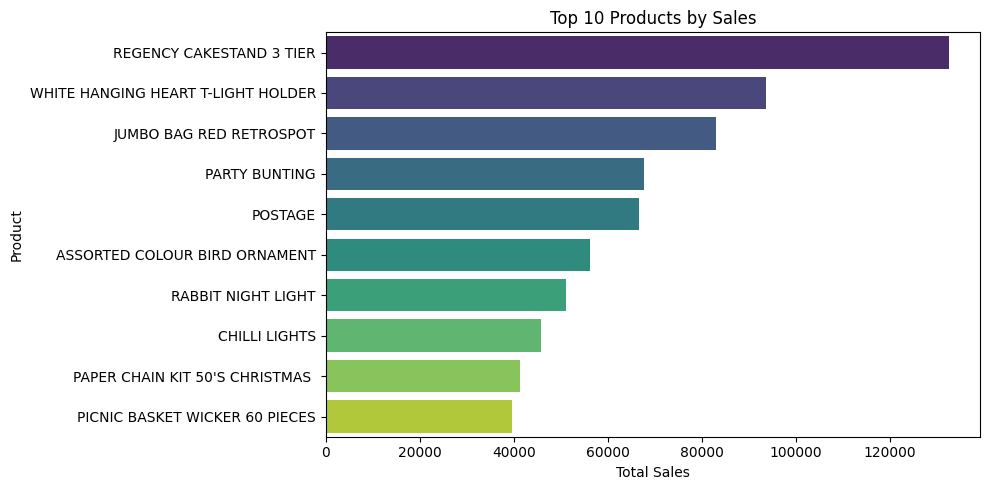

In [19]:
top_products = df.groupby('Description')['total_amount'].sum().sort_values(ascending=False).head(10)
print(top_products)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Sales by Country (Top 10)

Country
Netherlands    284661.54
EIRE           250001.78
Germany        221509.47
France         196626.05
Australia      137009.77
Switzerland     55739.40
Spain           54756.03
Belgium         40910.96
Sweden          36585.41
Japan           35340.62
Name: total_amount, dtype: float64


C:\Users\Home\AppData\Local\Temp\ipykernel_3424\1134768582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")


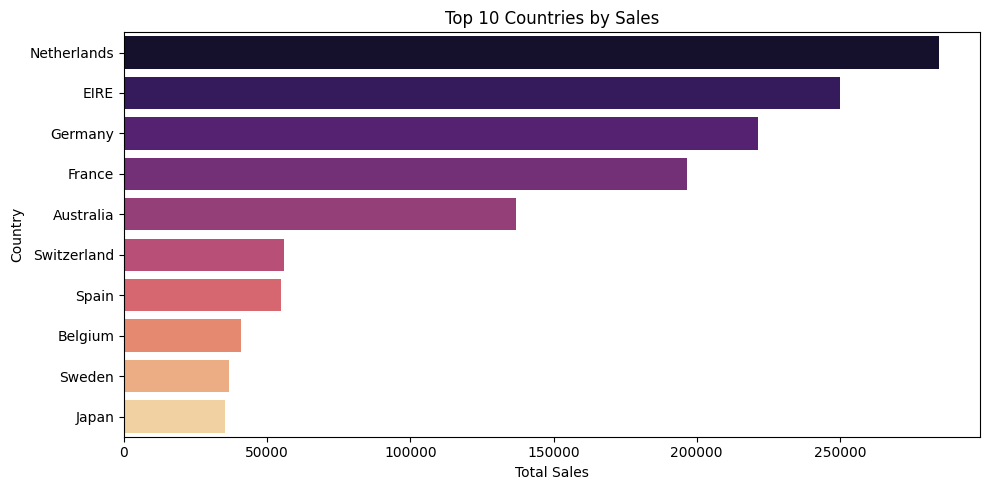

In [25]:
top_countries = (
    df[df['Country'].str.lower() != 'united kingdom']
    .groupby('Country')['total_amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_countries)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 🔹 Step 5: Hourly Purchase Pattern

hour
6        -497.350
7       31009.320
8      279985.430
9      654904.951
10    1148692.881
11    1053658.480
12    1332247.730
13    1118155.480
14     945058.221
15     896326.790
16     445930.100
17     212373.801
18     100525.120
19      44228.380
20      15920.090
Name: total_amount, dtype: float64


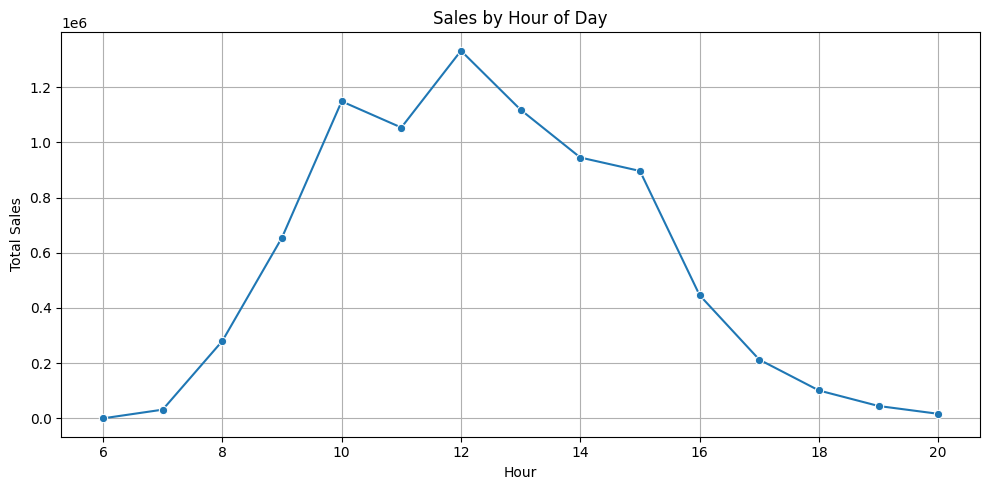

In [27]:
hourly_sales = df.groupby('hour')['total_amount'].sum()
print(hourly_sales)
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title("Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔹 Step 6: Returns vs Purchases

C:\Users\Home\AppData\Local\Temp\ipykernel_3424\2436173625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='invoice_type', palette='Set2')


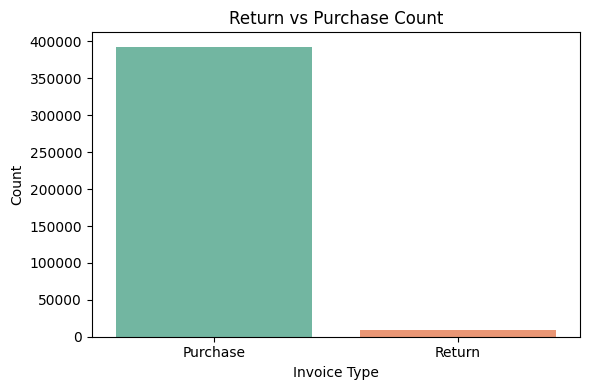

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='invoice_type', palette='Set2')
plt.title("Return vs Purchase Count")
plt.xlabel("Invoice Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 🔹 Step 7: Monthly Sales Trend

    year  month  total_amount month_year
0   2010     12    552372.860 2010-12-01
1   2011      1    473731.900 2011-01-01
2   2011      2    435534.070 2011-02-01
3   2011      3    578576.210 2011-03-01
4   2011      4    425222.671 2011-04-01
5   2011      5    647011.670 2011-05-01
6   2011      6    606862.520 2011-06-01
7   2011      7    573112.321 2011-07-01
8   2011      8    615078.090 2011-08-01
9   2011      9    929356.232 2011-09-01
10  2011     10    973306.380 2011-10-01
11  2011     11   1126815.070 2011-11-01
12  2011     12    341539.430 2011-12-01


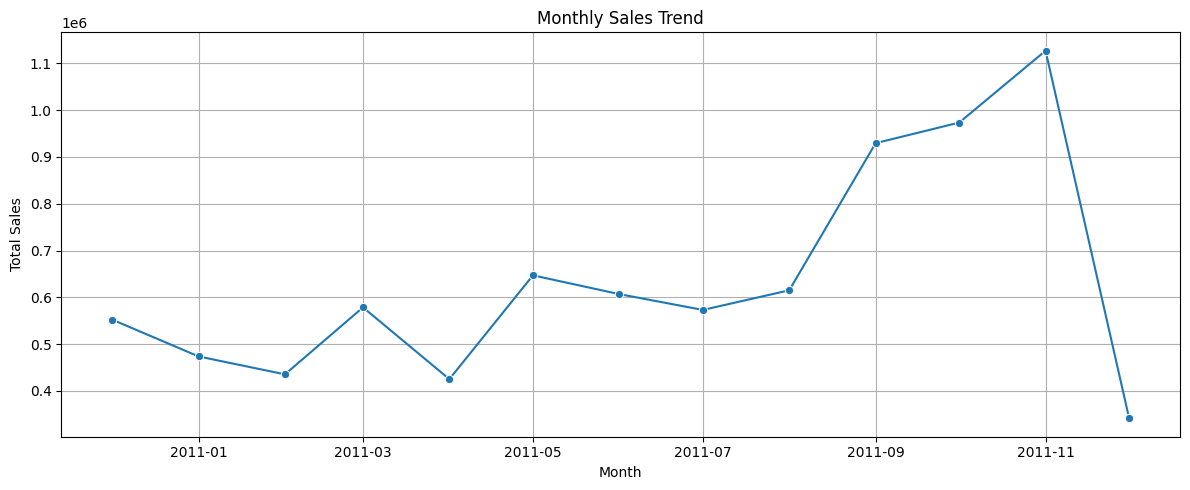

In [29]:
monthly_sales = df.groupby(['year', 'month'])['total_amount'].sum().reset_index()
monthly_sales['month_year'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))
print(monthly_sales)
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='month_year', y='total_amount', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()